In [1]:
import torch
from torch import nn
from torch.utils.data import DataLoader
import numpy as np

In [2]:
data = [[1,2], [3,4]]
x_data = torch.tensor(data)

In [3]:
np_array = np.array(data)
x_np = torch.from_numpy(np_array)

In [4]:
shape = (2,3)
rand_tensor = torch.rand(shape)
ones_tensor = torch.ones(shape)
zeros_tensor = torch.zeros(shape)

print(f"Random Tensor: \n {rand_tensor} \n")
print(f"Ones Tensor: \n {ones_tensor} \n")
print(f"Zeros Tensor: \n {zeros_tensor}")

Random Tensor: 
 tensor([[0.5887, 0.3416, 0.2740],
        [0.2244, 0.4483, 0.0147]]) 

Ones Tensor: 
 tensor([[1., 1., 1.],
        [1., 1., 1.]]) 

Zeros Tensor: 
 tensor([[0., 0., 0.],
        [0., 0., 0.]])


In [9]:
tensor = torch.rand(3,4)


print(f"Shape of tensor: {tensor.shape}")
print(f"Datatype of tensor: {tensor.dtype}")
print(f"Device tensor is stored on: {tensor.device}")

Shape of tensor: torch.Size([3, 4])
Datatype of tensor: torch.float32
Device tensor is stored on: cpu


In [10]:
tensor

tensor([[0.5850, 0.9858, 0.0246, 0.4152],
        [0.3054, 0.4695, 0.9291, 0.7773],
        [0.5429, 0.6650, 0.5762, 0.8799]])

In [11]:
t1 = torch.cat([tensor, tensor, tensor], dim=1)

In [29]:
y1 = tensor @ tensor.T

In [31]:
agg = tensor.sum()
agg

tensor(7.1559)

In [47]:
print(f"{tensor} \n")

tensor([[5.5850, 5.9858, 5.0246, 5.4152],
        [5.3054, 5.4695, 5.9291, 5.7773],
        [5.5429, 5.6650, 5.5762, 5.8799]]) 



In [49]:
t = tensor.numpy()
t


array([[5.5850277, 5.985791 , 5.0245786, 5.4152203],
       [5.305356 , 5.469516 , 5.929076 , 5.7772655],
       [5.5428867, 5.665007 , 5.5762215, 5.879912 ]], dtype=float32)

In [50]:
tensor.add_(1)

tensor([[6.5850, 6.9858, 6.0246, 6.4152],
        [6.3054, 6.4695, 6.9291, 6.7773],
        [6.5429, 6.6650, 6.5762, 6.8799]])

In [51]:
t

array([[6.5850277, 6.985791 , 6.0245786, 6.4152203],
       [6.305356 , 6.469516 , 6.929076 , 6.7772655],
       [6.5428867, 6.665007 , 6.5762215, 6.879912 ]], dtype=float32)

<h1>Datasets and Dataloaders</h1>

<h2>Loading the Data</h2>

FashionMNIST dataset

70000 images

60000 training and 10000 testing examples

28x28 pixel grayscale

labels for 10 classes


In [52]:
import torch 
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

In [69]:
training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

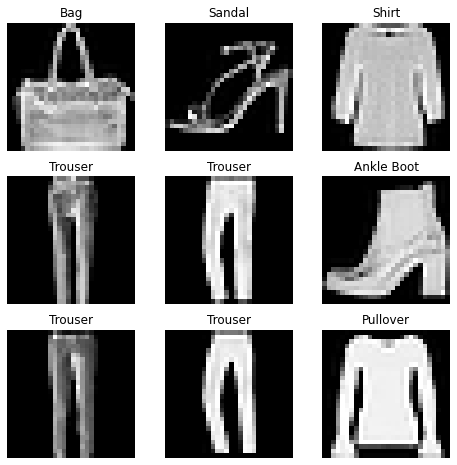

In [66]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}

figure = plt.figure(figsize=(8,8))
cols, rows = 3, 3

for i in range(1, cols*rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")    
plt.show()

<h2>Creating a custom dataset for my files</h2>

In [67]:
import os
import pandas as pd
from torchvision.io import read_image

class CustomImageDataset(Dataset):
    def __init__(self, annotations_file, img_dir, transform=None, target_transform=None):
        self.img_labels = pd.read_csv(annotations_file)
        self.img_dir = img_dir
        self.transform = transform
        self.target_transform = target_transform
        
    
    def __len__(self):
        return len(self.img_labels)
    
    
    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
        image = read_image(img_path)
        label = self.img_labels.iloc[idx, 1]
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)
        return image, label
    

<h2>Preparing data for training with DataLoaders</h2>

In [250]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(training_data, batch_size=32, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=32, shuffle=True)

Feature batch shape: torch.Size([32, 1, 28, 28])
Labels batch shape: torch.Size([32])


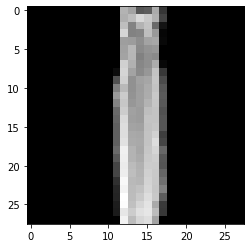

Label: 3


In [251]:
# Display Image and label
train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img, cmap='gray')
plt.show()
print(f"Label: {label}")

<h1>Transforms</h1>

In [252]:
from torchvision.transforms import ToTensor, Lambda

ds = datasets.FashionMNIST(root='data',
                           train=True,
                           download=True,
                           transform=ToTensor(),
                           target_transform=Lambda(lambda y: torch.zeros(10, dtype=torch.float).scatter(0,
                                                                                                        torch.tesnor(y), value=1))
                          )

<h1>Building the Neural Network</h1>

In [253]:
import os
from torch import nn
from torchvision import transforms

In [254]:
device = "cpu" if torch.cuda.is_available() else cpu
print(f"Using {device} device")

Using cpu device


In [255]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512,10)
        )
        
    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits
    

In [256]:
model = NeuralNetwork().to(device)
print(model)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


In [257]:
X = torch.rand(1, 28, 28, device=device)
logits = model(X)
pred_probab = nn.Softmax(dim=1)(logits)
y_pred = pred_probab.argmax(1)
print(f"Predicted class {y_pred}")

Predicted class tensor([9])


In [258]:
pred_probab

tensor([[0.0961, 0.1061, 0.0941, 0.0977, 0.0982, 0.0928, 0.1050, 0.0951, 0.0986,
         0.1163]], grad_fn=<SoftmaxBackward0>)

In [259]:
input_image = torch.rand(3, 28, 28)
input_image

tensor([[[0.5901, 0.7402, 0.3044,  ..., 0.2769, 0.9973, 0.8896],
         [0.7623, 0.0731, 0.3435,  ..., 0.7716, 0.9741, 0.2006],
         [0.6579, 0.1143, 0.6000,  ..., 0.5259, 0.6694, 0.5110],
         ...,
         [0.2440, 0.9427, 0.7895,  ..., 0.8833, 0.4258, 0.9971],
         [0.4204, 0.9192, 0.4749,  ..., 0.7321, 0.9761, 0.8748],
         [0.3392, 0.5364, 0.2229,  ..., 0.5069, 0.8262, 0.4133]],

        [[0.5455, 0.2370, 0.0546,  ..., 0.9956, 0.1100, 0.4542],
         [0.0670, 0.9120, 0.6105,  ..., 0.1958, 0.4519, 0.4992],
         [0.9527, 0.1877, 0.1171,  ..., 0.7700, 0.4385, 0.1562],
         ...,
         [0.5556, 0.7068, 0.8499,  ..., 0.8863, 0.7293, 0.2357],
         [0.4432, 0.8109, 0.4659,  ..., 0.5809, 0.9465, 0.8704],
         [0.1498, 0.1190, 0.3489,  ..., 0.2990, 0.5905, 0.5902]],

        [[0.2361, 0.3102, 0.2692,  ..., 0.9199, 0.1088, 0.0393],
         [0.9167, 0.8894, 0.9533,  ..., 0.5615, 0.5788, 0.6922],
         [0.8035, 0.3506, 0.4895,  ..., 0.7155, 0.9765, 0.

In [260]:
flatten = nn.Flatten()
flat_image = flatten(input_image)
print(flat_image.size())

torch.Size([3, 784])


In [261]:
layer1 = nn.Linear(in_features=28*28, out_features=20)
hidden1 = layer1(flat_image)
print(hidden1.size())

torch.Size([3, 20])


In [262]:
print(f"Before ReLU: {hidden1}")
hidden1 = nn.ReLU()(hidden1)
print(f"After ReLU: {hidden1}")

Before ReLU: tensor([[-0.0703, -0.0058, -0.2189,  0.2303, -0.2428,  0.3726,  0.1115,  0.6719,
          0.2417, -0.2134, -0.4383, -0.3765,  0.2461,  0.0499, -0.1433, -0.1272,
          0.2155,  0.2062,  0.0956, -0.4124],
        [-0.0532, -0.0088, -0.0055,  0.3442, -0.2471, -0.0977,  0.1688,  0.5621,
          0.2070, -0.3477, -0.3045, -0.2750,  0.2337, -0.1681, -0.3709,  0.0045,
         -0.0495,  0.3869, -0.2372,  0.2103],
        [-0.7854, -0.3785, -0.1711,  0.3062, -0.0758,  0.1937,  0.3718,  0.5158,
          0.2380, -0.2643, -0.3553, -0.3227, -0.1246, -0.1249, -0.1752,  0.1324,
          0.3553,  0.3493,  0.0453,  0.0565]], grad_fn=<AddmmBackward0>)
After ReLU: tensor([[0.0000, 0.0000, 0.0000, 0.2303, 0.0000, 0.3726, 0.1115, 0.6719, 0.2417,
         0.0000, 0.0000, 0.0000, 0.2461, 0.0499, 0.0000, 0.0000, 0.2155, 0.2062,
         0.0956, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.3442, 0.0000, 0.0000, 0.1688, 0.5621, 0.2070,
         0.0000, 0.0000, 0.0000, 0.2337, 0.0000, 0.0000

In [263]:
seq_modules = nn.Sequential(
    flatten,
    layer1,
    nn.ReLU(),
    nn.Linear(20, 10)
)

input_image = torch.rand(3, 28, 28)
logits = seq_modules(input_image)

In [264]:
logits

tensor([[-0.1497, -0.1828,  0.3275, -0.1125,  0.0573, -0.0239, -0.0395,  0.3672,
         -0.0478, -0.1722],
        [-0.1998, -0.2712,  0.3536, -0.2139,  0.0005, -0.0770, -0.0732,  0.3357,
         -0.1024, -0.2684],
        [-0.1274, -0.2740,  0.3672, -0.1780, -0.0460, -0.0741, -0.0884,  0.4227,
         -0.0371, -0.2531]], grad_fn=<AddmmBackward0>)

In [265]:
softmax = nn.Softmax(dim=1)
pred_prob = softmax(logits)
pred_prob

tensor([[0.0843, 0.0816, 0.1359, 0.0875, 0.1037, 0.0956, 0.0941, 0.1414, 0.0934,
         0.0824],
        [0.0841, 0.0783, 0.1463, 0.0829, 0.1028, 0.0951, 0.0955, 0.1437, 0.0927,
         0.0785],
        [0.0882, 0.0761, 0.1446, 0.0838, 0.0956, 0.0930, 0.0917, 0.1528, 0.0965,
         0.0777]], grad_fn=<SoftmaxBackward0>)

In [266]:
print(f"Model Structure: {model}\n\n")

for name, param in model.named_parameters():
    print(f"Layer: {name} | Size: {param.size()} | Values : {param[:2]} \n")

Model Structure: NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


Layer: linear_relu_stack.0.weight | Size: torch.Size([512, 784]) | Values : tensor([[-0.0033,  0.0072, -0.0264,  ...,  0.0220,  0.0284,  0.0127],
        [-0.0234,  0.0317,  0.0102,  ...,  0.0110, -0.0166,  0.0126]],
       grad_fn=<SliceBackward0>) 

Layer: linear_relu_stack.0.bias | Size: torch.Size([512]) | Values : tensor([0.0033, 0.0248], grad_fn=<SliceBackward0>) 

Layer: linear_relu_stack.2.weight | Size: torch.Size([512, 512]) | Values : tensor([[ 0.0181,  0.0393, -0.0342,  ...,  0.0030,  0.0290, -0.0089],
        [-0.0147, -0.0286, -0.0117,  ..., -0.0006,  0.0252,  0.0058]],
       grad_fn=<SliceBackward0>) 

Layer: linear_relu_stack.2.bias | Si

<h1>Automatic Differentiation with Torch.Autograd</h1>

In [267]:
x = torch.ones(5) # input tensor
y = torch.zeros(3) # expected output
w = torch.randn(5, 3, requires_grad=True)
b = torch.randn(3, requires_grad = True)
z = torch.matmul(x, w)+b
loss = torch.nn.functional.binary_cross_entropy_with_logits(z, y)
loss

tensor(1.5405, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)

In [268]:
def train_loop(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    for batch, (X,y) in enumerate(dataloader):
        pred=model(X)
        loss = loss_fn(pred, y)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if batch%100 == 0:
            loss, current = loss.item(), batch*len(X)
            print(f"loss: {loss:>7f} [{current:>5d}/{size:>5d}]")
            
            
def test_loop(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss, correct = 0, 0
    
    with torch.no_grad():
        for X,y in dataloader:
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()
            
    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg. Loss: {test_loss:>8f} \n")

In [269]:
learning_rate = 1e-3
batch_size = 64
epochs = 5

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------")
    train_loop(train_dataloader, model, loss_fn, optimizer)
    test_loop(test_dataloader, model, loss_fn)
print('Done!')

Epoch 1
-------------------------
loss: 2.300001 [    0/60000]
loss: 2.277525 [ 3200/60000]
loss: 2.272964 [ 6400/60000]
loss: 2.236795 [ 9600/60000]
loss: 2.214750 [12800/60000]
loss: 2.230278 [16000/60000]
loss: 2.209624 [19200/60000]
loss: 2.176745 [22400/60000]
loss: 2.167335 [25600/60000]
loss: 2.129325 [28800/60000]
loss: 2.105167 [32000/60000]
loss: 2.110177 [35200/60000]
loss: 2.094321 [38400/60000]
loss: 2.128995 [41600/60000]
loss: 2.012868 [44800/60000]
loss: 2.007255 [48000/60000]
loss: 1.923862 [51200/60000]
loss: 2.028585 [54400/60000]
loss: 1.864562 [57600/60000]
Test Error: 
 Accuracy: 57.2%, Avg. Loss: 1.871838 

Epoch 2
-------------------------
loss: 1.912487 [    0/60000]
loss: 1.884413 [ 3200/60000]
loss: 1.834139 [ 6400/60000]
loss: 1.747597 [ 9600/60000]
loss: 1.743492 [12800/60000]
loss: 1.673482 [16000/60000]
loss: 1.684543 [19200/60000]
loss: 1.612033 [22400/60000]
loss: 1.542521 [25600/60000]
loss: 1.526766 [28800/60000]
loss: 1.412032 [32000/60000]
loss: 1.5